# Capstone 2: Analyzing Hospital Length of Stay

## Libraries Required

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (9,7)

## Import Dataset

In [3]:
#read the data
data=pd.read_csv("/Users/rivkipinczower/Downloads/train_data.csv")
data['Count']=1

## **Data Cleansing**

In [4]:
#shape and data types of the data
print(data.shape)
print(data.dtypes)
print(data.describe())

(65499, 19)
case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
Count                                  int64
dtype: object
            case_id  Hospital_code  City_Code_Hospital  \
count  65499.000000   65499.000000        65499.000000   
mea

In [5]:
#select numeric columns
data_numeric=data.select_dtypes(include=[np.number])
numeric_cols=data_numeric.columns.values
print(numeric_cols)

['case_id' 'Hospital_code' 'City_Code_Hospital'
 'Available Extra Rooms in Hospital' 'Bed Grade' 'patientid'
 'City_Code_Patient' 'Visitors with Patient' 'Admission_Deposit' 'Count']


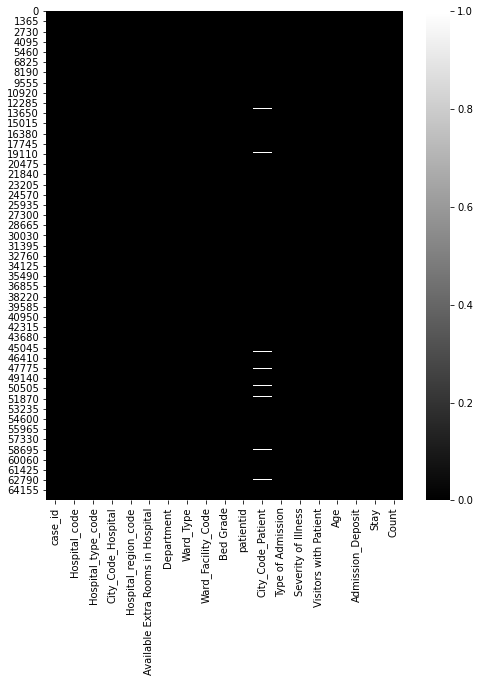

case_id                              False
Hospital_code                        False
Hospital_type_code                   False
City_Code_Hospital                   False
Hospital_region_code                 False
Available Extra Rooms in Hospital    False
Department                           False
Ward_Type                            False
Ward_Facility_Code                   False
Bed Grade                             True
patientid                            False
City_Code_Patient                     True
Type of Admission                    False
Severity of Illness                  False
Visitors with Patient                False
Age                                  False
Admission_Deposit                    False
Stay                                 False
Count                                False
dtype: bool


In [6]:
#find missing data
plt.figure(figsize=(8,9))
sns.heatmap(data.isna(),cmap='binary_r')
plt.show()
print(data.isna().any())

In [7]:
# % of missing data
for col in data:
    pct_missing=np.mean(data[col].isna())
    print('{} - {}'.format(col,pct_missing*100))

case_id - 0.0
Hospital_code - 0.0
Hospital_type_code - 0.0
City_Code_Hospital - 0.0
Hospital_region_code - 0.0
Available Extra Rooms in Hospital - 0.0
Department - 0.0
Ward_Type - 0.0
Ward_Facility_Code - 0.0
Bed Grade - 0.01832089039527321
patientid - 0.0
City_Code_Patient - 0.9832211178796622
Type of Admission - 0.0
Severity of Illness - 0.0
Visitors with Patient - 0.0
Age - 0.0
Admission_Deposit - 0.0
Stay - 0.0
Count - 0.0


In [8]:
print(data[data['Bed Grade'].isna()]['case_id'].count())


12


In [9]:
#since theres such a small number of missing rows, will replace with mode bed grade
mode_bg=data.mode()['Bed Grade'][0]
data['Bed Grade']=data['Bed Grade'].fillna(mode_bg)
print(data[data['Bed Grade'].isna()]['case_id'].count())

0


In [10]:
# will do the same with city-code
mode_ccp=data.mode()['City_Code_Patient'][0]
data['City_Code_Patient']=data['City_Code_Patient'].fillna(mode_ccp)
print(data[data['City_Code_Patient'].isna()]['case_id'].count())

0


In [14]:
data.to_csv('/Users/rivkipinczower/Downloads/hospital_data.csv')

## **Exploratory Data Analysis**

In [11]:
#explore the data
display(data.head(5))
for col in data:
    print('{} :{}'.format(col, data[col].unique()))

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Count
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,1


case_id :[    1     2     3 ... 65497 65498 65499]
Hospital_code :[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
Hospital_type_code :['c' 'e' 'b' 'a' 'f' 'd' 'g']
City_Code_Hospital :[ 3  5  1  2  6  9 10  4 11  7 13]
Hospital_region_code :['Z' 'X' 'Y']
Available Extra Rooms in Hospital :[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14]
Department :['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type :['R' 'S' 'Q' 'P' 'T' 'U']
Ward_Facility_Code :['F' 'E' 'D' 'B' 'A' 'C']
Bed Grade :[2. 3. 4. 1.]
patientid :[31397 63418  8088 ... 17315 15542 94475]
City_Code_Patient :[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.]
Type of Admission :['Emergency' 'Trauma' 'Urgent']
Severity of Illness :['Extreme' 'Moderate' 'Minor']
Visitors with Patient :[ 2  4  3  8  6  7 13  5  1 10 15 11 12  9 24 16 14 20  0 19 18 17 23 21
 32 

### Hospital & City Demographics 

#### We will now explore the issues related to the hospital both demographically and internally. 
 Geographically this includes: 
 - The amount of cases per region and city
 - The amount of cases per hospital type 
 - The number of hospitals per region and city.


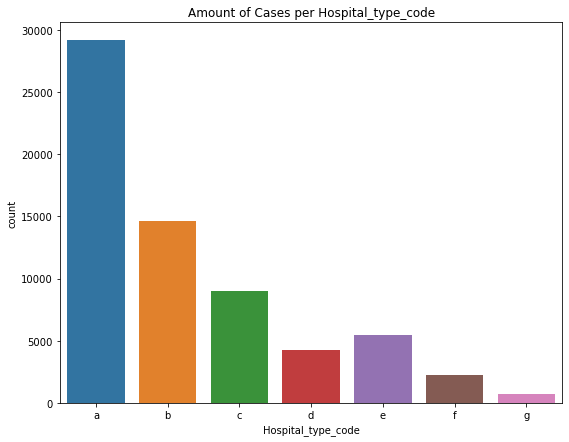

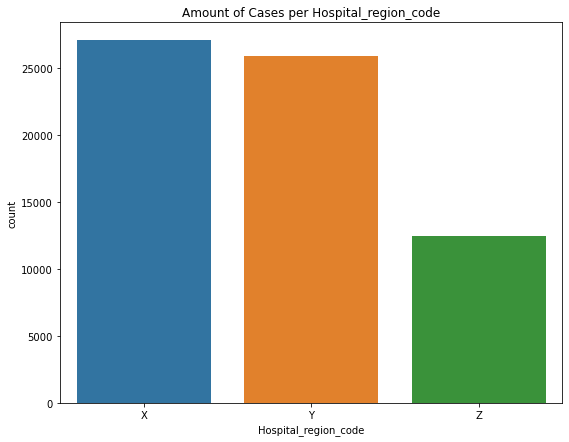

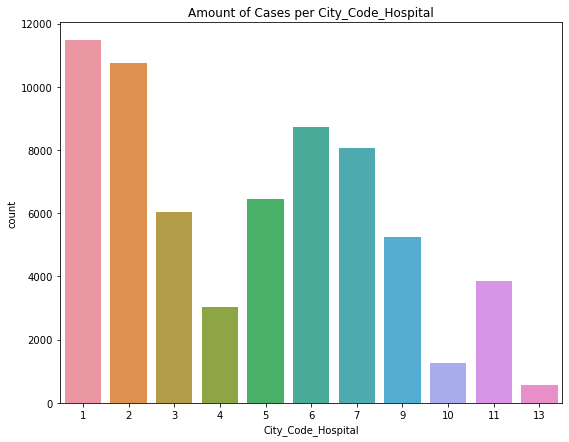

In [12]:
list=['Hospital_type_code','Hospital_region_code','City_Code_Hospital']
for item in list:
        sns.countplot(x=item,data=data.sort_values(by=item))
        plt.title('Amount of Cases per ' + item)
        plt.show()

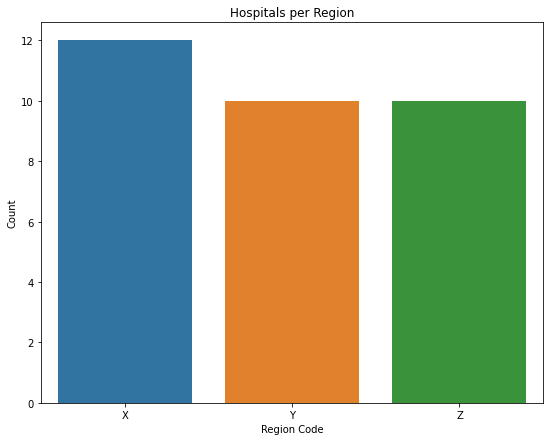

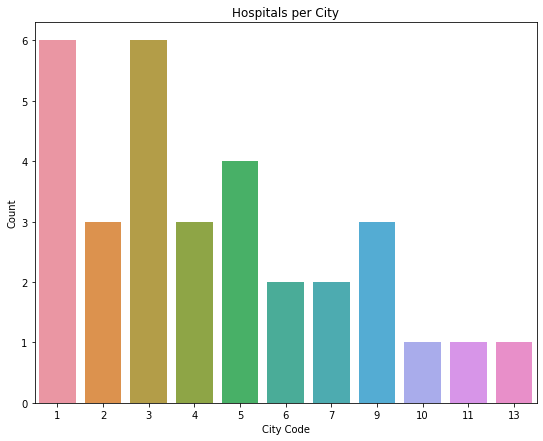

In [17]:
a=data.groupby(by='Hospital_region_code')["Hospital_code"].nunique()
b=data.groupby(by='City_Code_Hospital',as_index=False)['Hospital_code'].nunique()
sns.barplot(x='Hospital_region_code',y='Hospital_code',data=a.reset_index())
plt.title('Hospitals per Region')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.show()
sns.barplot(x='City_Code_Hospital',y='Hospital_code',data=b)
plt.xlabel('City Code')
plt.ylabel('Count')
plt.title('Hospitals per City')
plt.show()


#### Looking at the internal hospital demographics includes: 
 - Available extra rooms in the hospital
 - The amount of cases per department
 - The types of admission per region and department

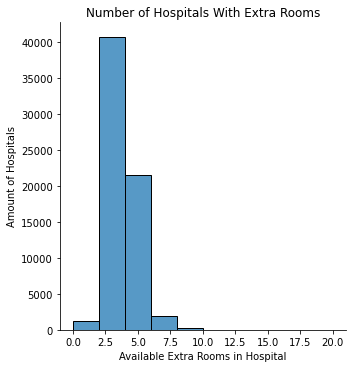

In [14]:
# checking how the extra rooms are distributed amoung hospitals
sns.displot(x=data['Available Extra Rooms in Hospital'],bins=10)
plt.title('Number of Hospitals With Extra Rooms')
plt.ylabel('Amount of Hospitals')
plt.show()


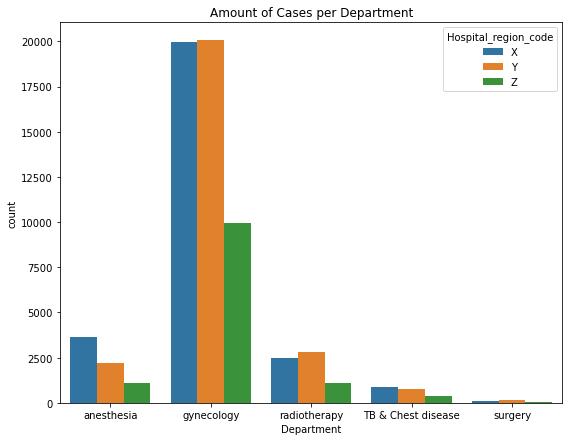

In [15]:
sns.countplot(x='Department',data=data.sort_values('Hospital_region_code'), hue='Hospital_region_code')
plt.title('Amount of Cases per Department')
plt.show()

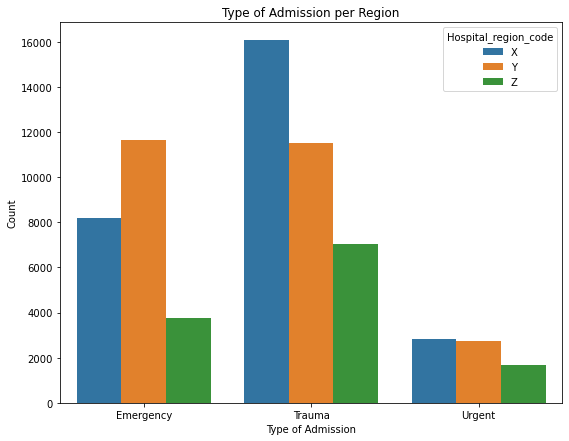

In [16]:
data.groupby(by=['Hospital_region_code','Type of Admission'])['Count'].sum()
sns.barplot(x='Type of Admission',y='Count',data=data.groupby(by=['Hospital_region_code','Type of Admission'],as_index=False)['Count'].sum(),hue='Hospital_region_code')
plt.title('Type of Admission per Region')
plt.show()

### Patient Demographics

We will now look at the patient demographics. This includes:
 - How many repeat patients?
 - Age and department of repear patients


#### What percentage of patients are repeats?

In [28]:
repeat=data['patientid'].value_counts().loc[lambda p:p>1].reset_index()
len(repeat)

12357

In [29]:
allpat=len(data['patientid'].unique())

In [30]:
print(str((len(repeat)/allpat)*100)+ '% of patients are repeats')

93.05670607726485% of patients are repeats


In [31]:
repeat_patients=data.loc[data['patientid'].isin (repeat['index'])]

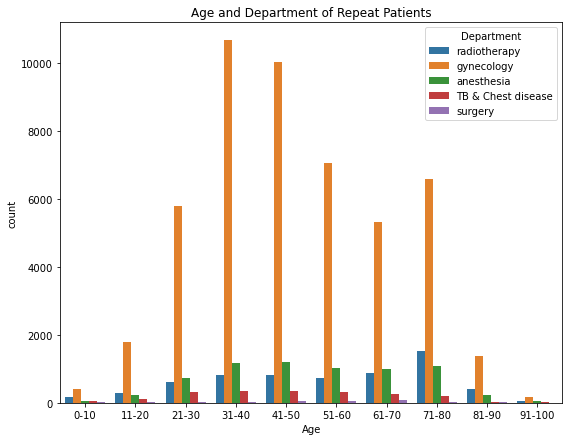

In [32]:
sns.countplot(x='Age',data= repeat_patients.sort_values(by='Age'),hue='Department')
plt.title('Age and Department of Repeat Patients')
plt.show()


##### Exploring All Patient Data
We will then explore the data of all patients including:
 - Age and amount of patients per department
 - Severity of illness per age group
 - Type of Admission per Age Group
 - Amount of Patients per City and Age Group

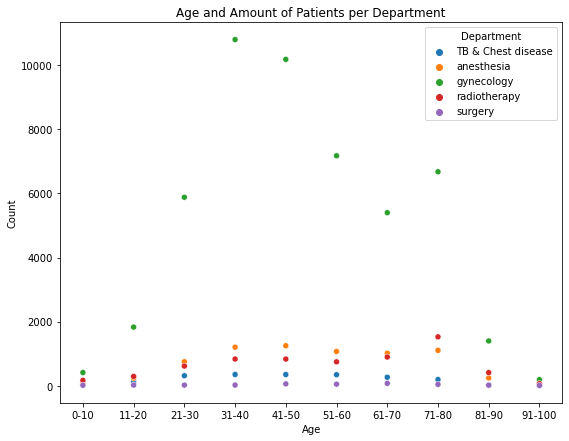

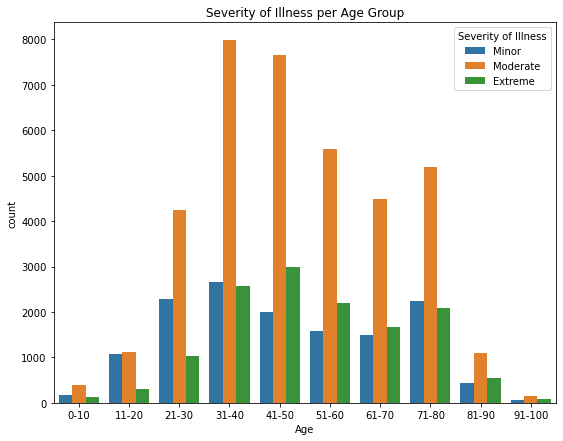

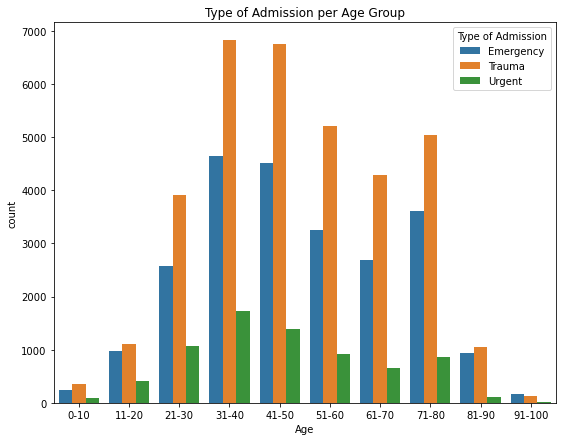

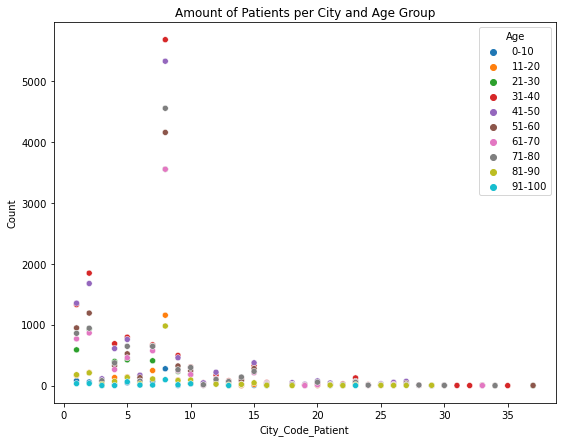

In [22]:
patients=data.groupby(by=['Age','Department'],as_index=False)['Count'].count()
sns.scatterplot(x='Age',y='Count',data=patients,hue='Department')
plt.title('Age and Amount of Patients per Department')
plt.show()
sns.countplot(x='Age',data=data.sort_values(by='Age'),hue='Severity of Illness')
plt.title('Severity of Illness per Age Group')
plt.show()
sns.countplot(x='Age',data=data.sort_values(by='Age'),hue='Type of Admission')
plt.title('Type of Admission per Age Group')
plt.show()
patientcity=data.groupby(by=['Age','City_Code_Patient'],as_index=False)['Count'].count()
sns.scatterplot(x='City_Code_Patient',y='Count',data=patientcity,hue='Age')
plt.title('Amount of Patients per City and Age Group')
plt.show()

### Exploring the length of Stay

The last thing we'll explore is the length of stay and which variables affect it.
This includes:
 - Length of stay per department
 - Length of stay per region
 - Length of stay per age and 
 - Length of stay per severity of illness

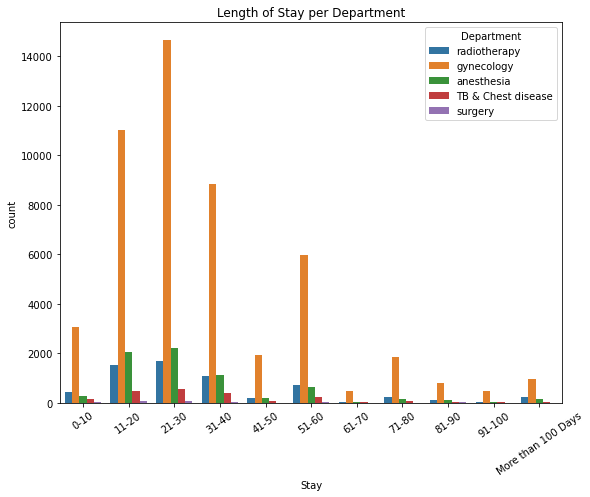

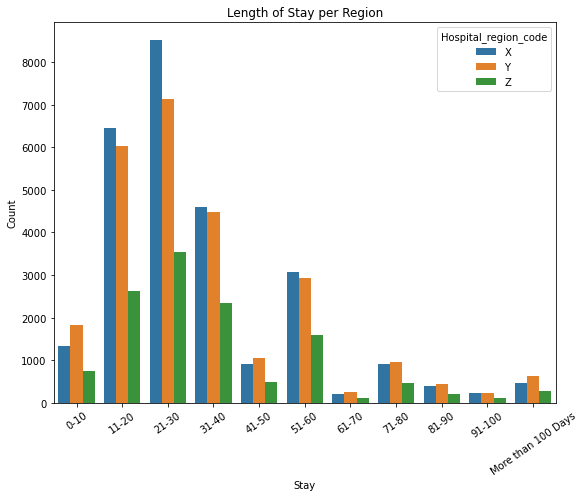

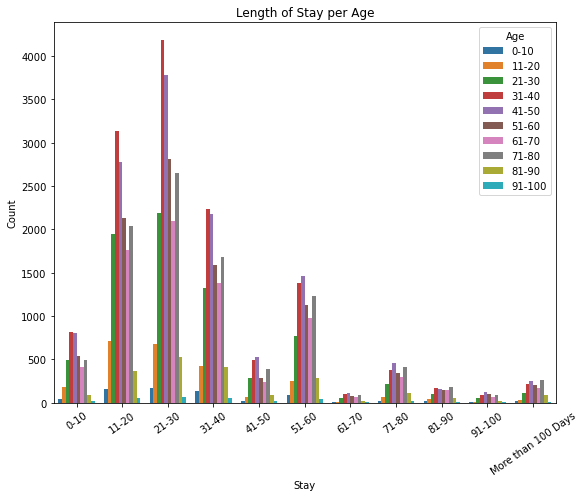

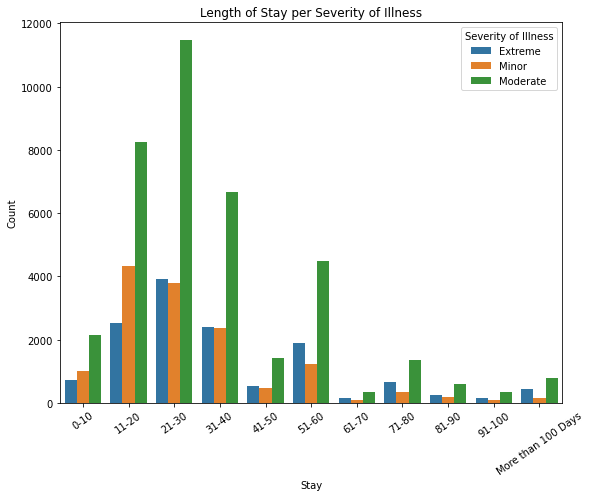

In [23]:
sns.countplot(x='Stay',data=data.sort_values(by='Stay'),hue="Department")
plt.xticks(rotation=35)
plt.title('Length of Stay per Department')
plt.show()
sns.barplot(x='Stay',y='Count',data=data.groupby(by=['Hospital_region_code','Stay'],as_index=False)['Count'].sum(),hue='Hospital_region_code')
plt.xticks(rotation=35)
plt.title('Length of Stay per Region')
plt.show()
list=['Age','Severity of Illness']
for item in list:
    sns.barplot(x='Stay',y='Count',data=data.groupby(by=[item,'Stay'],as_index=False)['Count'].sum(),hue=item)
    plt.xticks(rotation=35)
    plt.title('Length of Stay per ' + str(item))
    plt.show()


## Preparing data for logistic regression ##

In [52]:
# find the non numeric columns
objects= data.select_dtypes(include=['object']).columns

In [53]:
objects.drop(['Stay','Age'])


Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness'],
      dtype='object')

In [54]:
# define a function to turn these columns into numeric columns
def dummies(item):
    return(pd.get_dummies(data[item]))

hospital_type_dummies=dummies('Hospital_type_code')
hospital_region_dummies=dummies('Hospital_region_code')
department_dummies=dummies('Department')
ward_type_dummies=dummies('Ward_Type')
ward_facility_dummies=dummies('Ward_Facility_Code')
type_of_admission_dummies=dummies('Type of Admission')
severity_of_illness_dummies=dummies('Severity of Illness')

In [55]:
#create the training dataframe
train_data=pd.concat([data,hospital_type_dummies,hospital_region_dummies,department_dummies,ward_type_dummies,ward_facility_dummies,type_of_admission_dummies,severity_of_illness_dummies],axis=1)

In [56]:
# check the columns to make sure the data is numeric
for item in objects:
    train_data.drop(item,axis=1,inplace=True)
print(train_data.dtypes)

case_id                                int64
Hospital_code                          int64
City_Code_Hospital                     int64
Available Extra Rooms in Hospital      int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Visitors with Patient                  int64
Admission_Deposit                      int64
Count                                  int64
a                                      uint8
b                                      uint8
c                                      uint8
d                                      uint8
e                                      uint8
f                                      uint8
g                                      uint8
X                                      uint8
Y                                      uint8
Z                                      uint8
TB & Chest disease                     uint8
anesthesia                             uint8
gynecology

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# Turn the 'stay' column numeric
le=LabelEncoder()
copy1=data.copy()
copy1['stay']=le.fit_transform(data['Stay'])
train_data=pd.concat([train_data,copy1['stay']],axis=1)

In [60]:
# create function and transform 'Age' column
def change(ch):
    if ch =='0-10':
        return 5
    elif ch== '11-20':
        return 15
    elif ch=='21-30':
        return 25
    elif ch=='31-40':
        return 35
    elif ch=='41-50':
        return 45
    elif ch=='51-60':
        return 55
    elif ch=='61-70':
        return 65
    elif ch=='71-80':
        return 75
    elif ch=='81-90':
        return 85
    elif ch=='91-100':
        return 95
copy1['age']=copy1['Age'].apply(change)
print(copy1['age'])
#train_data=pd.concat([train_data,copy1['age']],axis=1)
print(train_data)

0        55
1        55
2        55
3        55
4        55
         ..
65494    75
65495    35
65496    35
65497    35
65498    35
Name: age, Length: 65499, dtype: int64
       case_id  Hospital_code  City_Code_Hospital  \
0            1              8                   3   
1            2              2                   5   
2            3             10                   1   
3            4             26                   2   
4            5             26                   2   
...        ...            ...                 ...   
65494    65495             19                   7   
65495    65496             10                   1   
65496    65497             28                  11   
65497    65498             28                  11   
65498    65499             14                   1   

       Available Extra Rooms in Hospital  Bed Grade  patientid  \
0                                      3        2.0      31397   
1                                      2        2.0      313

In [61]:
train_data=train_data.drop(['case_id','patientid'],axis=1)


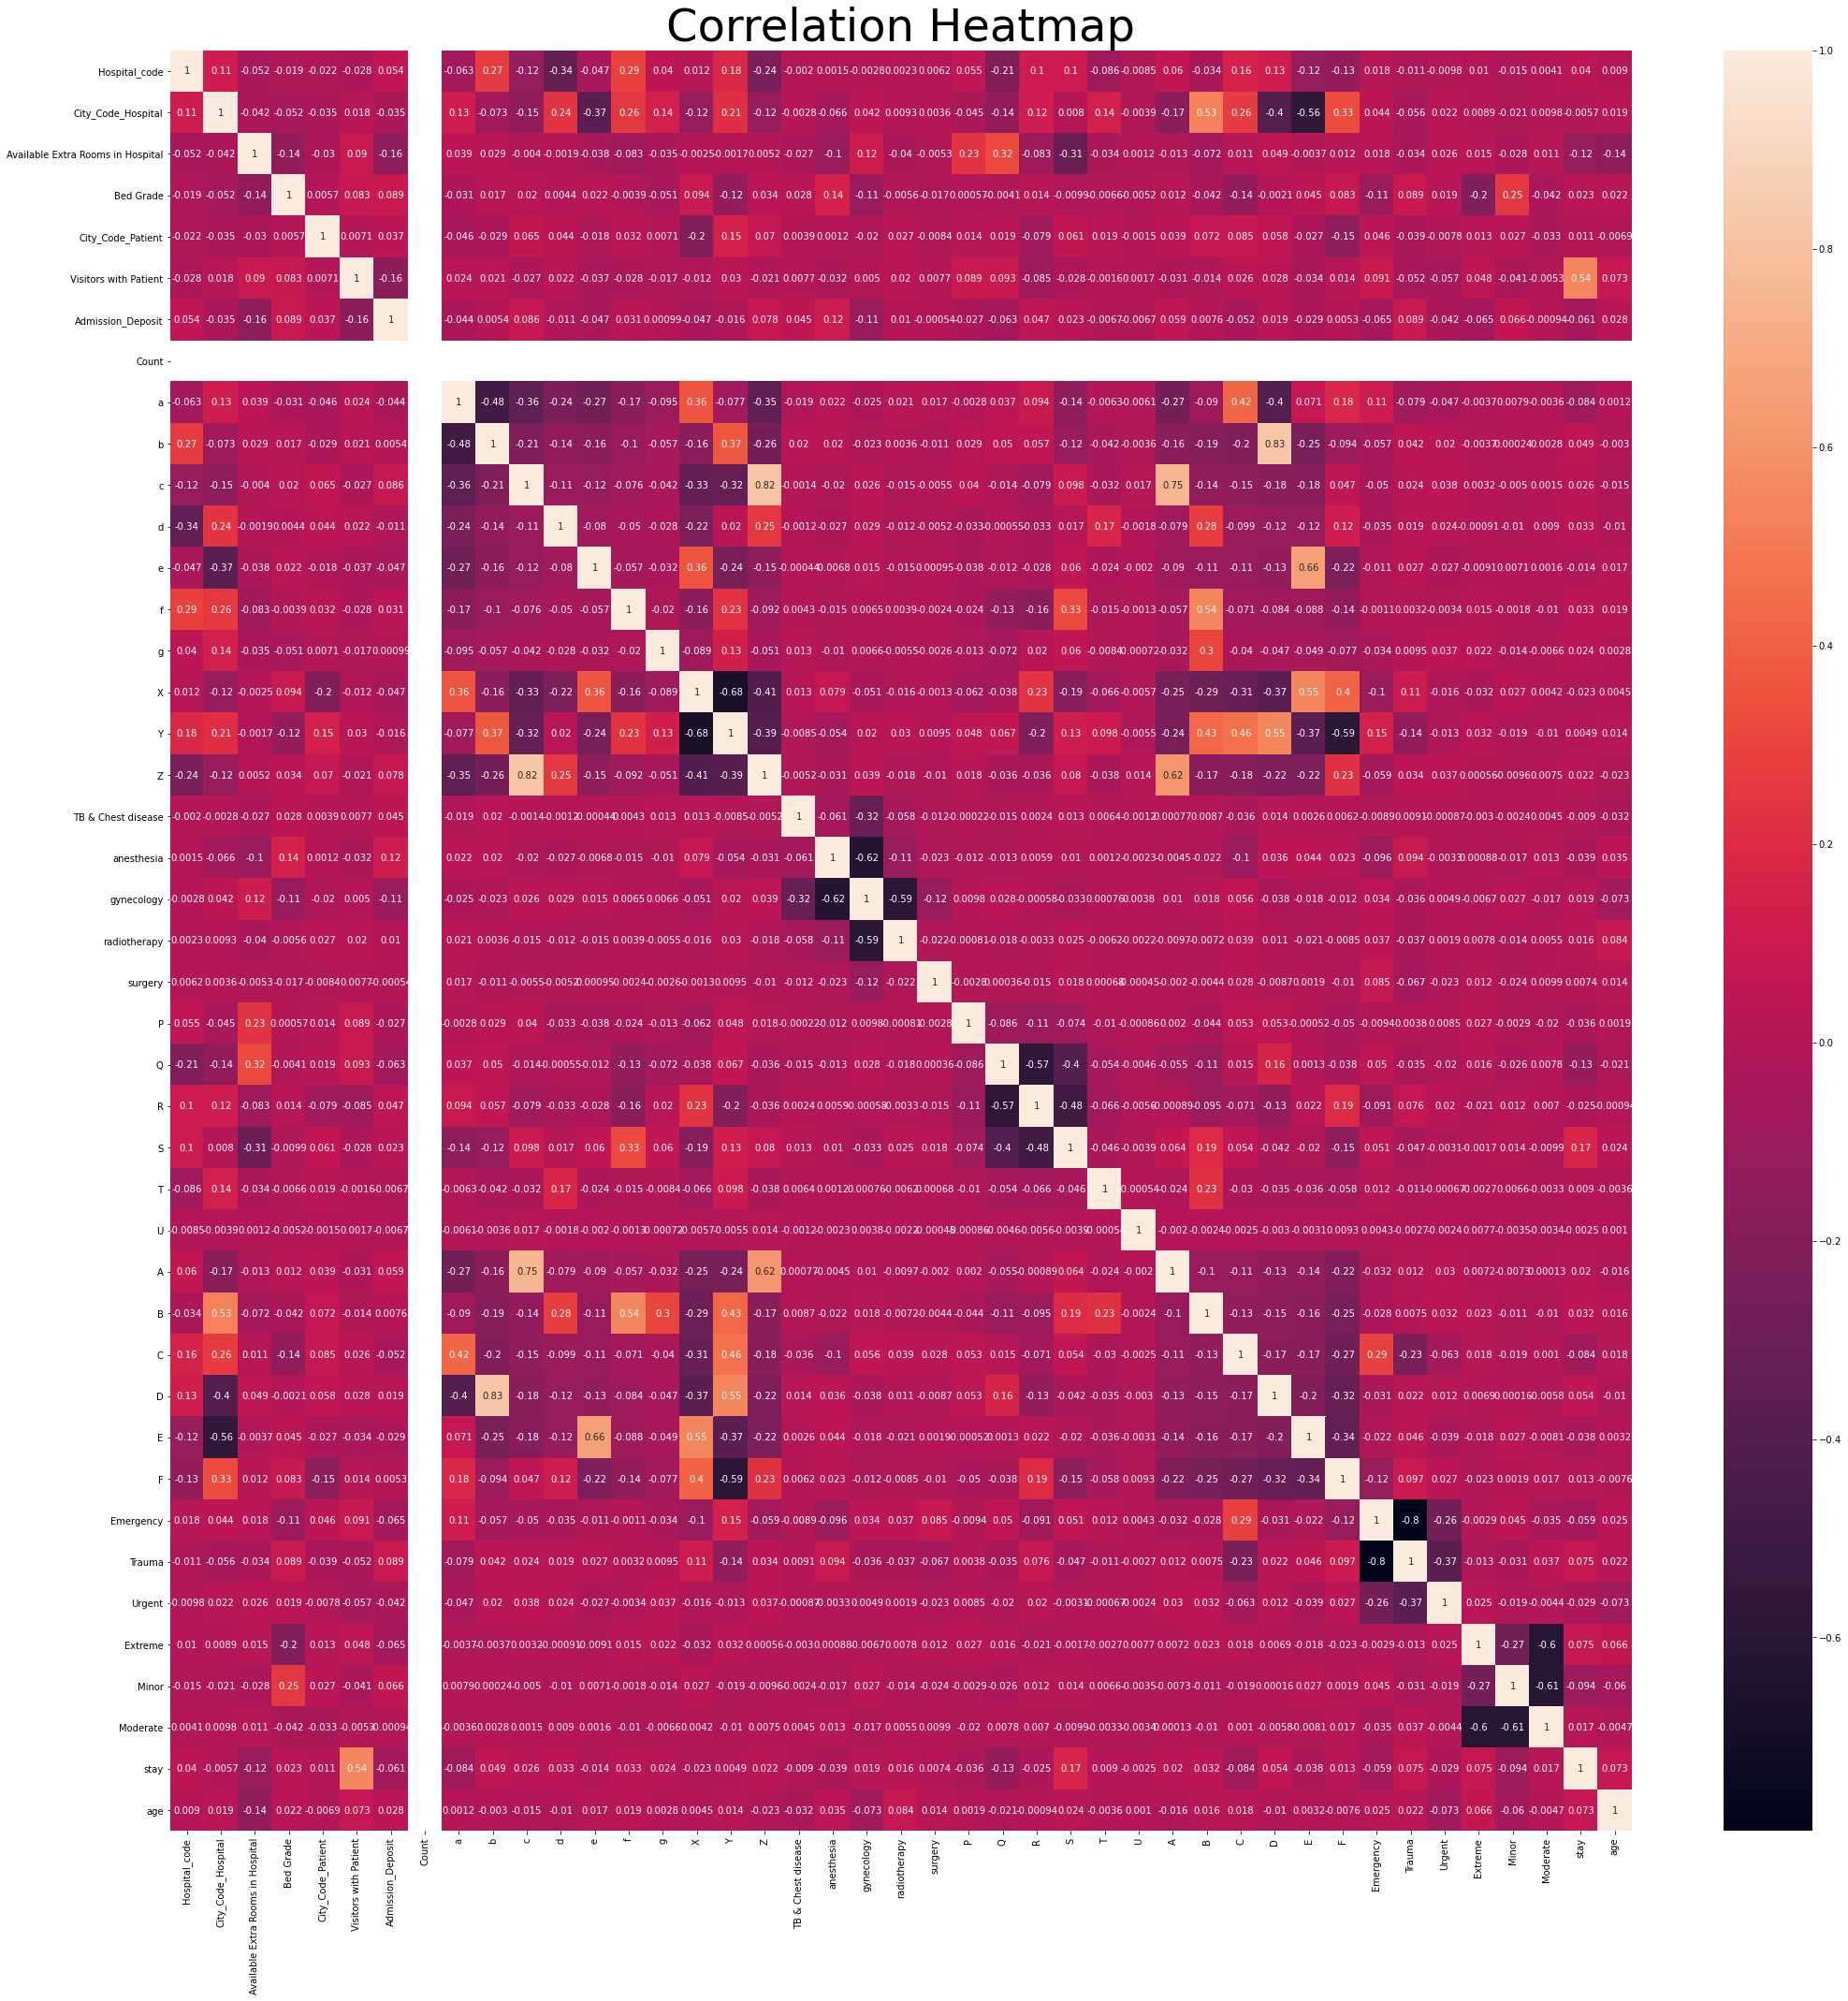

In [62]:
#check the correlations for multi-collinearity
train_data.corr()
fig,ax=plt.subplots()
fig.set_size_inches(35, 35)
sns.heatmap(train_data.corr(),annot=True,ax=ax)
plt.title('Correlation Heatmap',fontsize=48)
plt.show()


In [63]:
#delete the variables with multi-collinearity
train_data.drop('Count',axis=1,inplace=True)
train_data.drop('c',axis=1,inplace=True)
train_data.drop('D',axis=1,inplace=True)
train_data.drop('Emergency',axis=1,inplace=True)

In [64]:
train_data.columns

Index(['Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient',
       'Visitors with Patient', 'Admission_Deposit', 'a', 'b', 'd', 'e', 'f',
       'g', 'X', 'Y', 'Z', 'TB & Chest disease', 'anesthesia', 'gynecology',
       'radiotherapy', 'surgery', 'P', 'Q', 'R', 'S', 'T', 'U', 'A', 'B', 'C',
       'E', 'F', 'Trauma', 'Urgent', 'Extreme', 'Minor', 'Moderate', 'stay',
       'age'],
      dtype='object')

In [65]:
#create the x and y data
y_data=train_data['stay']
x_data=train_data.drop('stay',axis=1)

In [66]:
from sklearn.model_selection import train_test_split


In [67]:
# split the data into train and test
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)


## Logistic Regression ##

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()

In [70]:
model.fit(x_training_data,y_training_data)

/Users/rivkipinczower/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
predict =model.predict(x_test_data)

###### Check the Metrics

In [72]:
print('Train Accuracy:',model.score(x_training_data,y_training_data))
y_test_data=pd.to_numeric(y_test_data)
print('Test Accuracy:',model.score(x_test_data,y_test_data))

Train Accuracy: 0.30308185565661194
Test Accuracy: 0.30290076335877864


In [73]:
#precision score, recall score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('F1 Score:',metrics.f1_score(y_test_data, predict, average='weighted', labels=np.unique(predict)))
print('Precision Score:',metrics.precision_score(y_test_data,predict,average='weighted',labels=np.unique(predict)))
print('Recall Score:',metrics.recall_score(y_test_data,predict,average='weighted'))
print(classification_report(y_test_data,predict))

F1 Score: 0.2337083713358861
Precision Score: 0.24140173265686107
Recall Score: 0.30290076335877864
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1187
           1       0.23      0.10      0.14      4603
           2       0.32      0.90      0.48      5766
           3       0.17      0.04      0.06      3355
           4       0.00      0.00      0.00       756
           5       0.22      0.07      0.11      2252
           6       0.00      0.00      0.00       148
           7       0.00      0.00      0.00       703
           8       0.00      0.00      0.00       314
           9       0.00      0.00      0.00       172
          10       0.00      0.00      0.00       394

    accuracy                           0.30     19650
   macro avg       0.08      0.10      0.07     19650
weighted avg       0.20      0.30      0.19     19650



/Users/rivkipinczower/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


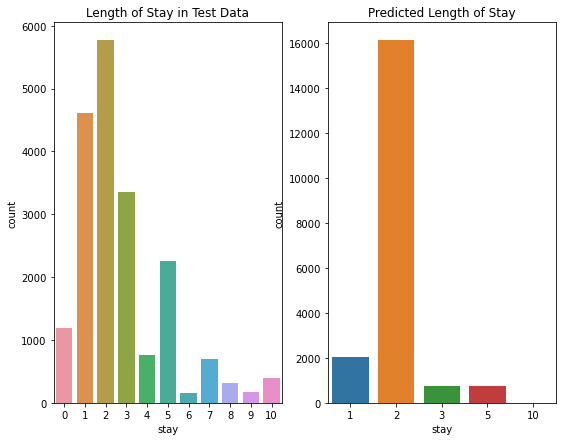

In [74]:
# Check the test data against the predicted data
predict=pd.Series(predict)
combined_data=pd.concat([y_test_data.reset_index(),predict],axis=1)
combined_data.drop('index',axis=1)
fig,ax=plt.subplots(1,2)
sns.countplot(x=combined_data['stay'],ax=ax[0]).set(title='Length of Stay in Test Data')
sns.countplot(x=combined_data[0],ax=ax[1]).set(title='Predicted Length of Stay',xlabel='stay')
plt.show()

## KNN Classification ##

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(x_training_data,y_training_data)

KNeighborsClassifier(n_neighbors=2)

In [77]:
knpredict=kn.predict(x_test_data)

###### Check the Metrics

In [78]:
print('Train Accuracy:',kn.score(x_training_data,y_training_data))
print('Test Accuracy:',kn.score(x_test_data,y_test_data))
print('F1 Score:',metrics.f1_score(y_test_data,knpredict,average='weighted'))
print('Precision Score:',metrics.precision_score(y_test_data,knpredict,average='weighted'))
print('Recall Score:',metrics.recall_score(y_test_data,knpredict,average='weighted'))
print(metrics.classification_report(y_test_data,knpredict))

Train Accuracy: 0.597526663613165
Test Accuracy: 0.23486005089058523
F1 Score: 0.21101354417427853
Precision Score: 0.22063756248019495
Recall Score: 0.23486005089058523
              precision    recall  f1-score   support

           0       0.08      0.15      0.11      1187
           1       0.25      0.42      0.32      4603
           2       0.31      0.34      0.32      5766
           3       0.17      0.12      0.14      3355
           4       0.04      0.02      0.02       756
           5       0.18      0.06      0.08      2252
           6       0.06      0.01      0.01       148
           7       0.06      0.01      0.01       703
           8       0.00      0.00      0.00       314
           9       0.00      0.00      0.00       172
          10       0.60      0.02      0.03       394

    accuracy                           0.23     19650
   macro avg       0.16      0.10      0.10     19650
weighted avg       0.22      0.23      0.21     19650



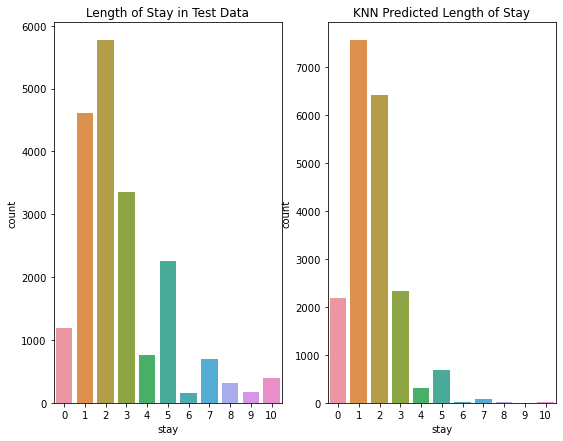

In [79]:
# Check the test data against the predicted data
knpredict=pd.Series(knpredict)
fig,ax=plt.subplots(1,2)
sns.countplot(x=y_test_data,ax=ax[0]).set(title='Length of Stay in Test Data')
sns.countplot(x=knpredict,ax=ax[1]).set(title='KNN Predicted Length of Stay',xlabel='stay')
plt.show()

### Random Forest Classification ###

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc=RandomForestClassifier()

In [82]:
rfc.fit(x_training_data,y_training_data)

RandomForestClassifier()

In [83]:
rfcpredict=rfc.predict(x_test_data)
***predict all data

In [165]:
# check the prediction of all the data
rfcpredict2=rfc.predict(x_data)

###### Check the Metrics

In [84]:
print('Train Accuracy:',rfc.score(x_training_data,y_training_data))
print('Test Accuracy:',rfc.score(x_test_data,y_test_data))

Train Accuracy: 0.999781892734847
Test Accuracy: 0.3885496183206107


In [166]:
# check the accuracy of the prediction of all the data
print('Test Accuracy:',rfc.score(x_data,y_data))

Test Accuracy: 0.8164094108306997


In [85]:
print(metrics.classification_report(y_test_data,rfcpredict))

              precision    recall  f1-score   support

           0       0.25      0.12      0.16      1187
           1       0.38      0.39      0.39      4603
           2       0.42      0.59      0.49      5766
           3       0.31      0.25      0.28      3355
           4       0.10      0.02      0.03       756
           5       0.41      0.49      0.45      2252
           6       0.07      0.01      0.02       148
           7       0.30      0.12      0.17       703
           8       0.47      0.22      0.30       314
           9       0.28      0.06      0.10       172
          10       0.59      0.46      0.51       394

    accuracy                           0.39     19650
   macro avg       0.32      0.25      0.26     19650
weighted avg       0.37      0.39      0.37     19650



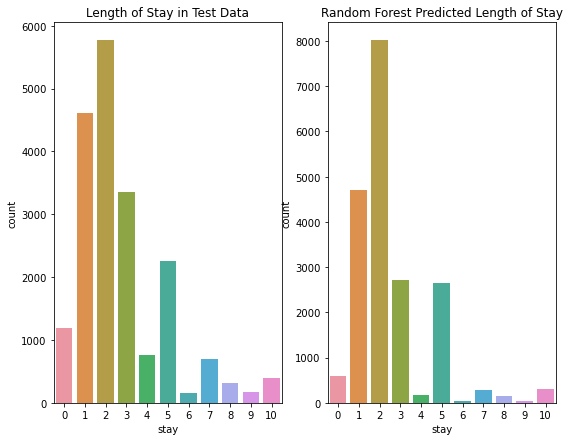

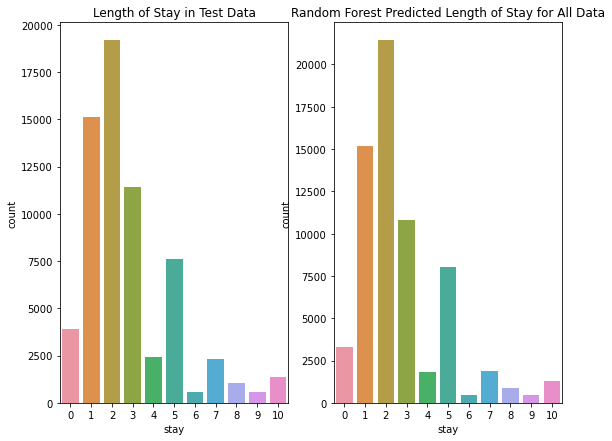

In [168]:
# Check the test data against the predicted data
rfcpredict=pd.Series(rfcpredict)
fig,ax=plt.subplots(1,2)
sns.countplot(x=y_test_data,ax=ax[0]).set(title='Length of Stay in Test Data')
sns.countplot(x=rfcpredict,ax=ax[1]).set(title='Random Forest Predicted Length of Stay',xlabel='stay')
plt.show()

fig,ax=plt.subplots(1,2)
sns.countplot(x=y_data,ax=ax[0]).set(title='Length of Stay in Test Data')
sns.countplot(x=rfcpredict2,ax=ax[1]).set(title='Random Forest Predicted Length of Stay for All Data',xlabel='stay')
plt.show()

## Insights

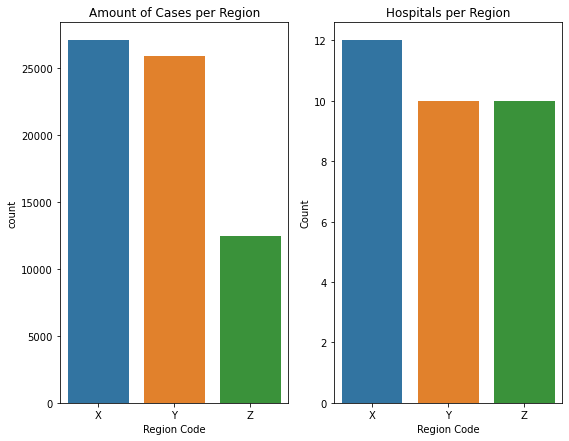

Hospital_region_code
X    27072
Y    25939
Z    12488
Name: Count, dtype: int64


In [119]:
fig,ax=plt.subplots(1,2)
sns.countplot(x='Hospital_region_code',data=data.sort_values(by='Hospital_region_code'),ax=ax[0]).set(title='Amount of Cases per Region',xlabel='Region Code')
plt.title('Amount of Cases per ' + 'Hospital_region_code')
sns.barplot(x='Hospital_region_code',y='Hospital_code',data=a.reset_index(),ax=ax[1])
plt.title('Hospitals per Region')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.show()
print(data.groupby(by='Hospital_region_code')['Count'].count())

- Region X has the most cases (27072), closely followed by Region Y (25939), with Region Z accounting for only 12488 cases
- Region X has the most hospitals (12) which is appropriate due to its high case volume.
- Region Y & Z both have 10 hospitals. 
- Due to the large amount of cases in Region Y, some funds from Region Z should be redirected to Region Z to expand their hospitals and improve efficiency.

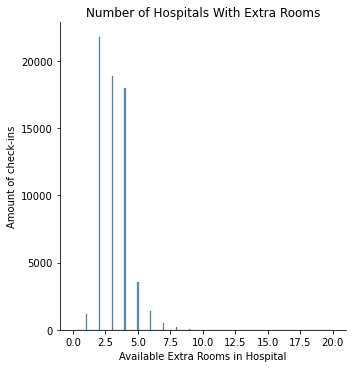

Hospital_region_code
X    3.123707
Y    3.124793
Z    3.139494
Name: Available Extra Rooms in Hospital, dtype: float64
2     21773
3     18909
4     17981
5      3524
6      1400
1      1189
7       470
8       183
9        42
10       16
12        5
11        3
0         2
20        1
14        1
Name: Available Extra Rooms in Hospital, dtype: int64


In [181]:
sns.displot(x=data['Available Extra Rooms in Hospital'])
plt.title('Number of Hospitals With Extra Rooms')
plt.ylabel('Amount of check-ins')
plt.show()
print(data.groupby(by='Hospital_region_code')['Available Extra Rooms in Hospital'].mean())
print(data['Available Extra Rooms in Hospital'].value_counts())

- As seen in the histogram, over 20,000 patients checked in to a hospital with 2 available rooms, followed closely by 3 (18909 check-ins) & 4 (17981) available rooms.
- The available rooms are split evenly within each region, with an average of 3 available rooms when a patient comes to the hospital. 

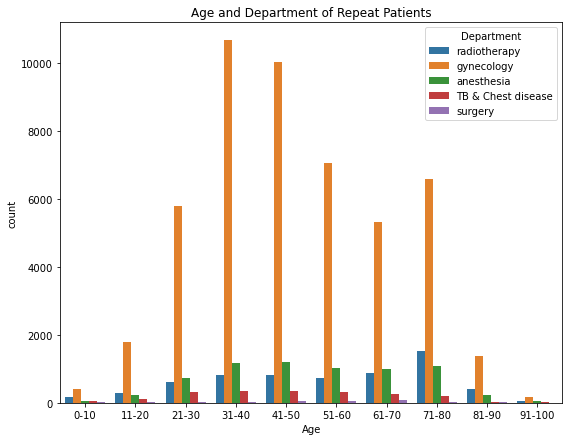

In [33]:
sns.countplot(x='Age',data= repeat_patients.sort_values(by='Age'),hue='Department')
plt.title('Age and Department of Repeat Patients')
plt.show()

- Repeat patients most often come through the gynecology depratment, which makes sense due to women having multiple babies. This is also why most of these patients are between the ages of 21 - 60.


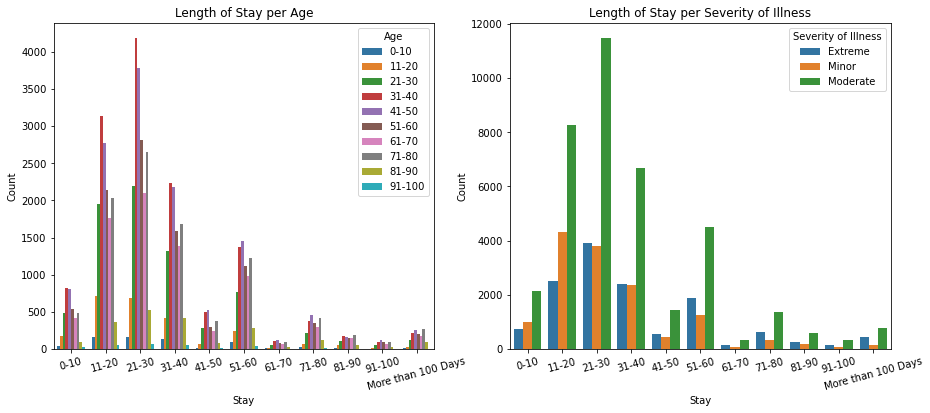

21-30                 19173
11-20                 15100
31-40                 11420
51-60                  7601
0-10                   3893
41-50                  2426
71-80                  2335
More than 100 Days     1383
81-90                  1037
91-100                  572
61-70                   559
Name: Stay, dtype: int64


In [164]:
list=['Age','Severity of Illness']
i=0
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 6)
for item in list:
    sns.barplot(x='Stay',y='Count',data=data.groupby(by=[item,'Stay'],as_index=False)['Count'].sum(),hue=item,ax=ax[i]).set_title('Length of Stay per ' + str(item))
    i=i+1
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=15)
plt.show()
print(data['Stay'].value_counts())

- As can be seen in the above graphs, the most common length of stay for patients is 21-30 days (19173 patients) followed by 11-20 days (15100)
- Least common length of stay is 61-70 days(559 patients)
- When looking at the stays between 0-40 days, the largest portion of patients are patients under the age of 40. As the stay gets longer (40 days +), the older patients(71-80) make up the largest portion of patients. 


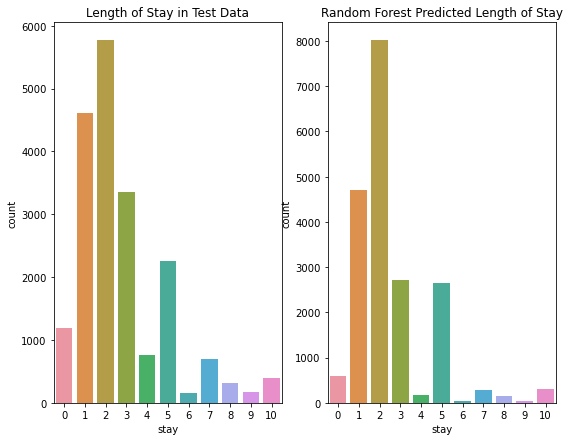

Train Accuracy: 0.999781892734847
Test Accuracy: 0.3885496183206107


In [110]:
fig,ax=plt.subplots(1,2)
sns.countplot(x=y_test_data,ax=ax[0]).set(title='Length of Stay in Test Data')
sns.countplot(x=rfcpredict,ax=ax[1]).set(title='Random Forest Predicted Length of Stay',xlabel='stay')
plt.show()
print('Train Accuracy:',rfc.score(x_training_data,y_training_data))
print('Test Accuracy:',rfc.score(x_test_data,y_test_data))

- After trying logistic regression, KNN classification & Random Forest Classification to predict the length of stay, Random Forest Classification came up with the best results.
- Although it has a test accuracy of ~40%, it can be another helpful feature to take into account when coming up with a patient care plan.